Text(0.5, 1.0, 'Abundance Map')

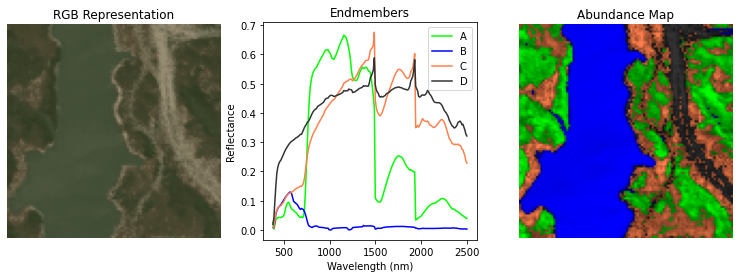

In [2]:
from operator import index
import scipy.io as sio
import matplotlib.pyplot as plt
from spec2rgb import ColourSystem
import numpy as np

data_path = 'Zf_imagen.mat'

data = sio.loadmat(data_path)


img_spec = data['Zf']
E = data['E']
A = data['A']

color_space = "sRGB"
start, end = 380, 2500 # VariSpec VIS
number_bands = img_spec.shape[-1]


img_spec -= np.min(img_spec)
img_spec /= np.max(img_spec)


cs = ColourSystem(cs=color_space, start=start, end=end, num=number_bands)
img_rgb = cs.spec_to_rgb(img_spec)


fig, axs = plt.subplots(1, 3, figsize=(13, 4))

idxs = np.argmax(A, axis=-1)

# indxs to one hot
one_hot = np.zeros((idxs.shape[0], idxs.shape[1], 4))

for i in range(idxs.shape[0]):
    for j in range(idxs.shape[1]):
        one_hot[i, j, idxs[i, j]] = 1

# one hot to rgb
rgb = np.zeros((one_hot.shape[0], one_hot.shape[1], 3))

# PALETA DE COLOR
colors = np.array([
    [  0,   1,   0],  # ENDMEMBER 1
    [  0,   0,   1],  # ENDMEMBER 2
    [  1, 0.5, 0.3],  # ENDMEMBER 3
    [0.2, 0.2, 0.2],  # ENDMEMBER 4
])



Acolor = np.dot(one_hot, colors)

Aw =  np.multiply(A, one_hot).sum(axis=-1)[..., None]
Acolor = Aw * Acolor


axs[0].axis('off')
axs[2].axis('off')

axs[0].imshow(np.power(img_rgb, 0.7))
axs[0].set_title("RGB Representation")


ejex = np.linspace(start, end, number_bands)

axs[1].plot(ejex, E[:,0], color=colors[0], label="A")
axs[1].plot(ejex, E[:,1], color=colors[1], label="B")
axs[1].plot(ejex, E[:,2], color=colors[2], label="C")
axs[1].plot(ejex, E[:,3], color=colors[3], label="D")

axs[1].legend()



axs[1].set_title("Endmembers")
axs[1].set_xlabel("Wavelength (nm)")
axs[1].set_ylabel("Reflectance")

axs[2].imshow(Acolor)
axs[2].set_title("Abundance Map")

